<a href="https://colab.research.google.com/github/holdenkim/codingT/blob/main/BBGS_Part3_6_mychapts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv('Fvote.csv')

In [28]:
data.head(2)

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54a1cc8710>,
      dtype=object)

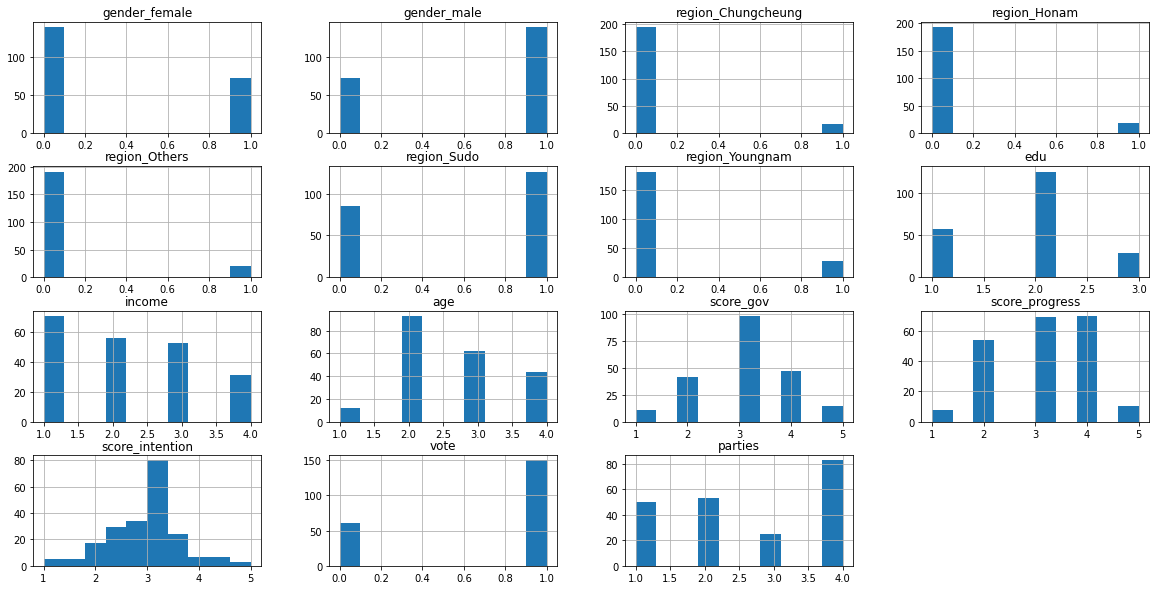

In [29]:
data.hist(figsize=(20,10))

In [30]:
data.corr()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
gender_female,1.000000,-1.000000,-0.139597,0.087881,-0.130517,0.101999,0.003027,-0.071159,-0.159860,-0.173359,0.052040,-0.029438,-0.052302,-0.158422,0.130428
gender_male,-1.000000,1.000000,0.139597,-0.087881,0.130517,-0.101999,-0.003027,0.071159,0.159860,0.173359,-0.052040,0.029438,0.052302,0.158422,-0.130428
region_Chungcheung,-0.139597,0.139597,1.000000,-0.093121,-0.095790,-0.360412,-0.118164,0.035020,0.056549,0.057667,0.074537,0.025211,0.007575,-0.003277,0.009151
region_Honam,0.087881,-0.087881,-0.093121,1.000000,-0.101795,-0.383003,-0.125571,-0.092229,0.156213,0.125082,0.068873,-0.065613,-0.007029,-0.018520,0.072118
region_Others,-0.130517,0.130517,-0.095790,-0.101795,1.000000,-0.393980,-0.129170,0.068763,0.103861,0.091477,0.014812,0.035497,0.111434,-0.007781,-0.111161
region_Sudo,0.101999,-0.101999,-0.360412,-0.383003,-0.393980,1.000000,-0.486003,-0.112641,-0.211395,-0.148897,0.029065,0.081170,-0.026362,0.030406,0.022230
region_Youngnam,0.003027,-0.003027,-0.118164,-0.125571,-0.129170,-0.486003,1.000000,0.150950,0.038201,-0.015295,-0.170183,-0.111205,-0.057393,-0.018707,-0.004286
edu,-0.071159,0.071159,0.035020,-0.092229,0.068763,-0.112641,0.150950,1.000000,0.384059,0.124840,0.133648,0.147603,0.122808,0.132338,-0.045436
income,-0.159860,0.159860,0.056549,0.156213,0.103861,-0.211395,0.038201,0.384059,1.000000,0.548953,0.002353,0.064231,-0.049757,0.154474,-0.041721
age,-0.173359,0.173359,0.057667,0.125082,0.091477,-0.148897,-0.015295,0.124840,0.548953,1.000000,-0.149428,-0.074284,-0.005303,0.251059,-0.054660


In [5]:
X = data[data.columns[0:13]]
y = data['vote']

In [6]:
#minmax scaling 진행

In [7]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [8]:
mms.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
X_Minmax_Scaled = mms.transform(X)

standard scaling 진행

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [11]:
ss.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_standard_Scaled = (X)

In [13]:
#train test 분리 그리고 분석

In [14]:
from sklearn.model_selection import train_test_split
X_mms_train, X_mms_test, y_mms_train, y_mms_test = train_test_split( X_Minmax_Scaled, y, random_state=42, stratify=y)
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split( X_standard_Scaled, y, random_state=42, stratify=y)

In [15]:
from sklearn.linear_model import LogisticRegression
model_mms = LogisticRegression()
model_std = LogisticRegression()

In [16]:
model_mms.fit(X_mms_train,y_mms_train)
model_std.fit(X_std_train,y_std_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
Pred_mms = model_mms.predict(X_mms_test)
Pred_std = model_std.predict(X_std_test)

In [18]:
Score_mms = model_mms.score(X_mms_test, y_mms_test)
Score_std = model_std.score(X_std_test, y_std_test)

In [19]:
print(Score_mms)
print(Score_std)

0.7169811320754716
0.6792452830188679


In [20]:
#혼동행렬 분석

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm_mms = confusion_matrix(y_mms_test, Pred_mms)
print(cm_mms)
cm_std = confusion_matrix(y_std_test, Pred_std)
print(cm_std)

[[ 2 13]
 [ 2 36]]
[[ 3 12]
 [ 5 33]]


In [26]:
#혼동행렬
#TN FP
#FN TP

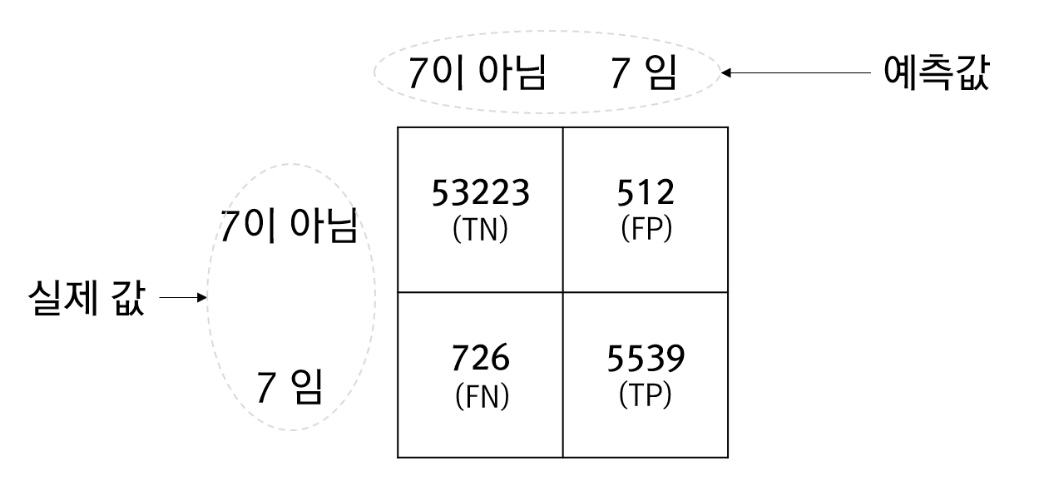